In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from dataset import Data, ResizeTransform
from gan import GeneratorNet, Discriminator, train
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATA_PATH = 'data/img_align_celeba'
BATCH_SIZE = 16
NUM_WORKERS = 2
Z_SIZE = 16
transform = ResizeTransform()
data = Data(DATA_PATH, transform)
data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, drop_last=True)

In [3]:
generator = GeneratorNet(Z_SIZE).cuda()
discriminator = Discriminator().cuda()

In [ ]:
train(generator, discriminator, data_loader, 10)


G_loss:  tensor(9006.8486, device='cuda:0') D_loss: tensor(9132.4648, device='cuda:0')
G_loss:  tensor(9212.0840, device='cuda:0') D_loss: tensor(9166.8545, device='cuda:0')
G_loss:  tensor(9038.3545, device='cuda:0') D_loss: tensor(9181.0293, device='cuda:0')


In [8]:
Z = torch.normal(mean=torch.zeros(1, generator.z_size)).cuda()
G_sample = generator(Z)

In [15]:
img = np.transpose(G_sample[0].data.cpu().numpy(), (1, 2, 0))

print(img.shape)

(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


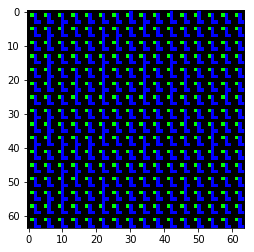

In [16]:
plt.imshow(img)